In [1]:
import pandas as pd
import missingno as mn
import matplotlib
import matplotlib.pyplot as plt
from datetime import datetime
matplotlib.rcParams['figure.figsize'] = [20, 10]

In [66]:
all_data = pd.read_csv('Film_Permits.csv')

In [68]:
all_data.head()

,EventID,EventType,StartDateTime,EndDateTime,EnteredOn,EventAgency,ParkingHeld,Borough,CommunityBoard(s),PolicePrecinct(s),Category,SubCategoryName,Country,ZipCode(s)
0,300134,Shooting Permit,07/18/2016 06:00:00 AM,07/18/2016 12:00:00 PM,07/13/2016 10:28:02 AM,"Mayor's Office of Film, Theatre & Broadcasting",COLUMBUS AVENUE between WEST 67 STREET and W...,Manhattan,7,20,Television,Morning Show,United States of America,10023
1,299797,Shooting Permit,07/18/2016 07:00:00 AM,07/18/2016 07:00:00 PM,07/11/2016 06:49:08 PM,"Mayor's Office of Film, Theatre & Broadcasting",22 STREET between QUEENS PLAZA SOUTH and 43 AV...,Queens,2,108,Television,Cable-episodic,United States of America,11101
2,300179,Shooting Permit,07/18/2016 07:00:00 AM,07/18/2016 10:00:00 PM,07/13/2016 12:11:19 PM,"Mayor's Office of Film, Theatre & Broadcasting",MONITOR STREET between NORMAN AVENUE and GREEN...,Queens,"1, 2","108, 94",Television,Episodic series,United States of America,"11101, 11222, 11378"
3,300630,Shooting Permit,07/18/2016 12:00:00 PM,07/18/2016 09:00:00 PM,07/14/2016 10:13:56 PM,"Mayor's Office of Film, Theatre & Broadcasting",ROCKAWAY BEACH BOULEVARD between BEACH 69 ST...,Queens,14,100,Commercial,Commercial,United States of America,11692
4,300127,Shooting Permit,07/18/2016 06:00:00 AM,07/18/2016 11:59:00 PM,07/13/2016 10:04:20 AM,"Mayor's Office of Film, Theatre & Broadcasting",10 AVENUE between WEST 26 STREET and WEST ...,Manhattan,4,10,Television,Reality,United States of America,10001


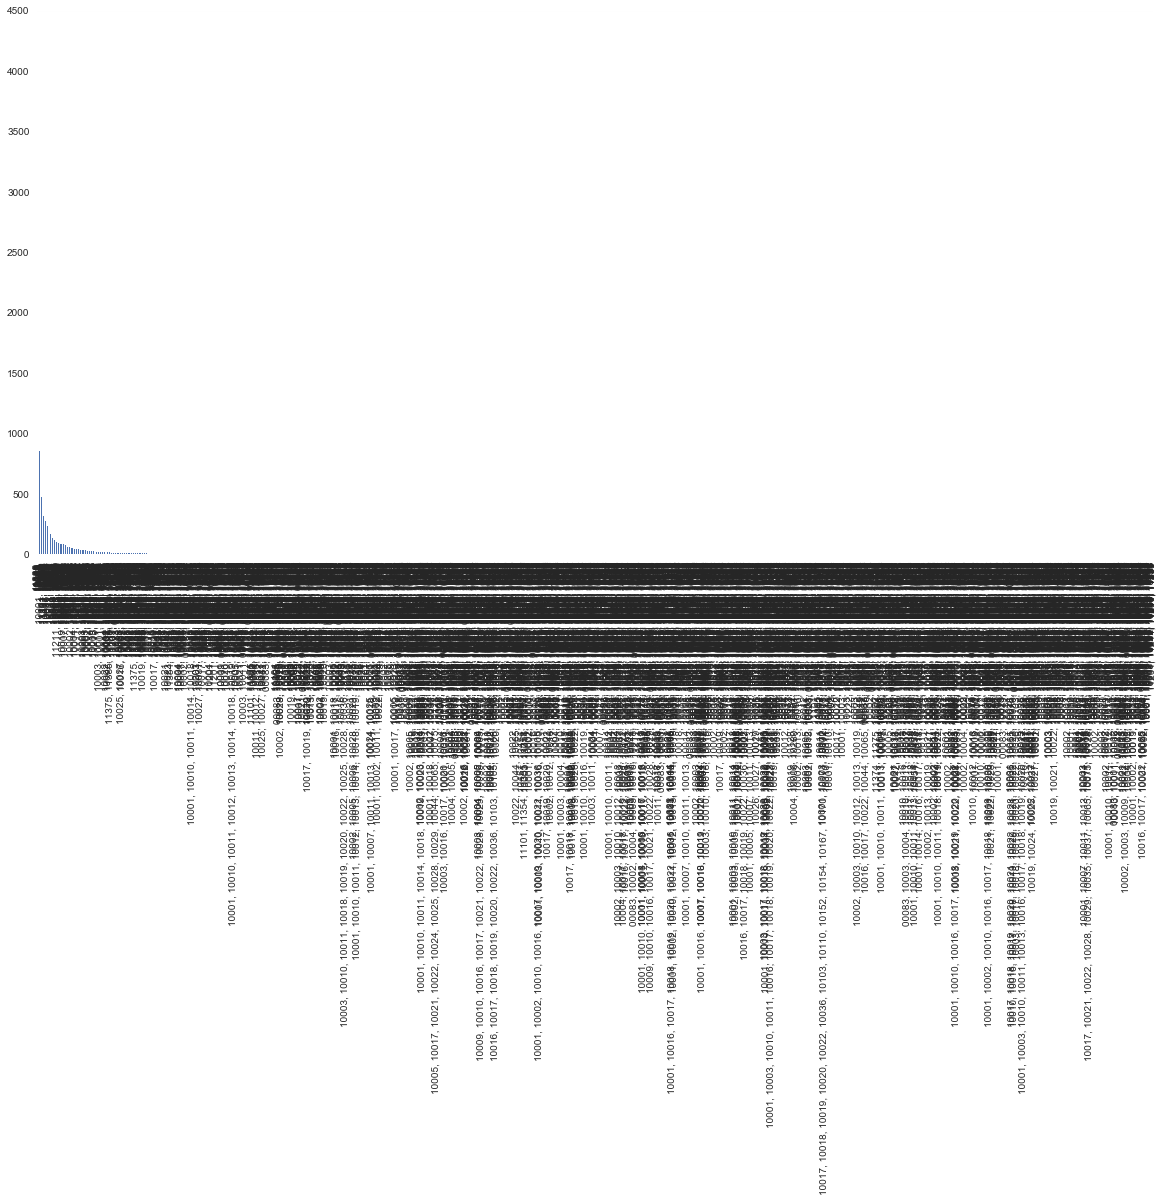

In [69]:
pd.value_counts(all_data['ZipCode(s)']).plot.bar()
plt.show()

In [70]:
all_data['StartDateTime'] = pd.to_datetime(all_data['StartDateTime'], format='%m/%d/%Y %I:%M:%S %p')
all_data['EndDateTime'] = pd.to_datetime(all_data['EndDateTime'], format='%m/%d/%Y %I:%M:%S %p')

In [115]:
all_data['StartDateYear'] = all_data['StartDateTime'].dt.year
all_data['EndDateYear'] = all_data['EndDateTime'].dt.year
all_data['StartDateMonth'] = all_data['StartDateTime'].dt.month
all_data['EndDateMonth'] = all_data['EndDateTime'].dt.month

In [116]:
all_data.head()

,EventID,EventType,StartDateTime,EndDateTime,EnteredOn,EventAgency,ParkingHeld,Borough,CommunityBoard(s),PolicePrecinct(s),Category,SubCategoryName,Country,ZipCode(s),StartDateYear,EndDateYear,DiffSeconds,StartDateMonth,EndDateMonth
0,300134,Shooting Permit,2016-07-18 06:00:00,2016-07-18 12:00:00,07/13/2016 10:28:02 AM,"Mayor's Office of Film, Theatre & Broadcasting",COLUMBUS AVENUE between WEST 67 STREET and W...,Manhattan,7,20,Television,Morning Show,United States of America,10023,2016,2016,21600.0,7,7
1,299797,Shooting Permit,2016-07-18 07:00:00,2016-07-18 19:00:00,07/11/2016 06:49:08 PM,"Mayor's Office of Film, Theatre & Broadcasting",22 STREET between QUEENS PLAZA SOUTH and 43 AV...,Queens,2,108,Television,Cable-episodic,United States of America,11101,2016,2016,43200.0,7,7
2,300179,Shooting Permit,2016-07-18 07:00:00,2016-07-18 22:00:00,07/13/2016 12:11:19 PM,"Mayor's Office of Film, Theatre & Broadcasting",MONITOR STREET between NORMAN AVENUE and GREEN...,Queens,"1, 2","108, 94",Television,Episodic series,United States of America,"11101, 11222, 11378",2016,2016,54000.0,7,7
3,300630,Shooting Permit,2016-07-18 12:00:00,2016-07-18 21:00:00,07/14/2016 10:13:56 PM,"Mayor's Office of Film, Theatre & Broadcasting",ROCKAWAY BEACH BOULEVARD between BEACH 69 ST...,Queens,14,100,Commercial,Commercial,United States of America,11692,2016,2016,32400.0,7,7
4,300127,Shooting Permit,2016-07-18 06:00:00,2016-07-18 23:59:00,07/13/2016 10:04:20 AM,"Mayor's Office of Film, Theatre & Broadcasting",10 AVENUE between WEST 26 STREET and WEST ...,Manhattan,4,10,Television,Reality,United States of America,10001,2016,2016,64740.0,7,7


In [73]:
all_data.loc[all_data['StartDateYear'] != all_data['EndDateYear']]

,EventID,EventType,StartDateTime,EndDateTime,EnteredOn,EventAgency,ParkingHeld,Borough,CommunityBoard(s),PolicePrecinct(s),Category,SubCategoryName,Country,ZipCode(s),StartDateYear,EndDateYear
4141,324716,Shooting Permit,2016-12-27 00:01:00,2017-01-21 23:59:00,12/20/2016 12:31:30 PM,"Mayor's Office of Film, Theatre & Broadcasting",AMSTERDAM AVENUE between WEST 62 STREET and ...,Manhattan,7,20,Television,Not Applicable,United States of America,10023,2016,2017
4143,302431,Theater Load in and Load Outs,2016-12-28 00:01:00,2017-01-01 06:00:00,07/25/2016 03:57:52 PM,"Mayor's Office of Film, Theatre & Broadcasting",WEST 33 STREET between 7 AVENUE and 8 AVENUE,Manhattan,5,14,Theater,Theater,United States of America,"10001, 10121",2016,2017
4145,324805,Theater Load in and Load Outs,2016-12-29 00:01:00,2017-01-01 06:00:00,12/21/2016 09:52:29 AM,"Mayor's Office of Film, Theatre & Broadcasting",8 AVENUE between WEST 31 STREET and WEST 3...,Manhattan,"4, 5",14,Theater,Theater,United States of America,"10001, 10121",2016,2017
4146,322988,Shooting Permit,2016-12-29 01:00:00,2017-01-01 03:00:00,12/06/2016 05:28:09 PM,"Mayor's Office of Film, Theatre & Broadcasting",WEST 65 STREET between BROADWAY and AMSTERDA...,Manhattan,7,20,Television,Not Applicable,United States of America,10023,2016,2017
4147,320838,Theater Load in and Load Outs,2016-12-30 06:00:00,2017-01-01 06:00:00,11/25/2016 04:30:36 PM,"Mayor's Office of Film, Theatre & Broadcasting",AMSTERDAM AVENUE between WEST 73 STREET and ...,Manhattan,7,20,Theater,Theater,United States of America,10023,2016,2017
4149,313548,Theater Load in and Load Outs,2016-12-31 00:01:00,2017-01-01 06:00:00,10/06/2016 10:09:20 AM,"Mayor's Office of Film, Theatre & Broadcasting",WEST 27 STREET between 10 AVENUE and 11 AVENUE,Manhattan,4,10,Theater,Theater,United States of America,10001,2016,2017
13443,245600,Theater Load in and Load Outs,2015-12-30 00:01:00,2016-01-03 06:00:00,09/16/2015 10:08:32 AM,"Mayor's Office of Film, Theatre & Broadcasting",WEST 33 STREET between 7 AVENUE and 8 AVENUE...,Manhattan,5,14,Theater,Theater,United States of America,"10001, 10121",2015,2016
13493,81529,Theater Load in and Load Outs,2012-12-31 00:01:00,2013-01-01 12:00:00,12/19/2012 11:53:58 AM,"Mayor's Office of Film, Theatre & Broadcasting",8 AVENUE between WEST 31 STREET and WEST 3...,Manhattan,"4, 5",14,Theater,Theater,United States of America,"10001, 10121",2012,2013
14419,256232,Theater Load in and Load Outs,2015-12-30 06:00:00,2016-01-01 06:00:00,11/24/2015 11:52:05 PM,"Mayor's Office of Film, Theatre & Broadcasting",AMSTERDAM AVENUE between WEST 73 STREET and ...,Manhattan,7,20,Theater,Theater,United States of America,10023,2015,2016
14985,79348,Theater Load in and Load Outs,2012-12-30 06:00:00,2013-01-01 06:00:00,11/30/2012 12:07:52 AM,"Mayor's Office of Film, Theatre & Broadcasting",AMSTERDAM AVENUE between WEST 73 STREET and ...,Manhattan,7,20,Theater,Theater,United States of America,10023,2012,2013


In [117]:
relevant_data = all_data

In [118]:
relevant_data.drop(['EnteredOn','EventAgency','ParkingHeld','CommunityBoard(s)',
                   'PolicePrecinct(s)','Country', 'EventType'], axis=1)

,EventID,StartDateTime,EndDateTime,Borough,Category,SubCategoryName,ZipCode(s),StartDateYear,EndDateYear,DiffSeconds,StartDateMonth,EndDateMonth
0,300134,2016-07-18 06:00:00,2016-07-18 12:00:00,Manhattan,Television,Morning Show,10023,2016,2016,21600.0,7,7
1,299797,2016-07-18 07:00:00,2016-07-18 19:00:00,Queens,Television,Cable-episodic,11101,2016,2016,43200.0,7,7
2,300179,2016-07-18 07:00:00,2016-07-18 22:00:00,Queens,Television,Episodic series,"11101, 11222, 11378",2016,2016,54000.0,7,7
3,300630,2016-07-18 12:00:00,2016-07-18 21:00:00,Queens,Commercial,Commercial,11692,2016,2016,32400.0,7,7
4,300127,2016-07-18 06:00:00,2016-07-18 23:59:00,Manhattan,Television,Reality,10001,2016,2016,64740.0,7,7
5,43547,2012-01-10 07:00:00,2012-01-10 19:00:00,Brooklyn,Television,Episodic series,"11101, 11222",2012,2012,43200.0,1,1
6,300435,2016-07-18 07:00:00,2016-07-18 21:00:00,Brooklyn,Television,Episodic series,11222,2016,2016,50400.0,7,7
7,300417,2016-07-18 06:00:00,2016-07-18 22:00:00,Queens,Television,Episodic series,11101,2016,2016,57600.0,7,7
8,300441,2016-07-18 09:30:00,2016-07-18 23:00:00,Brooklyn,WEB,Not Applicable,11218,2016,2016,48600.0,7,7
9,300122,2016-07-18 00:01:00,2016-07-20 06:00:00,Manhattan,Theater,Theater,10027,2016,2016,194340.0,7,7


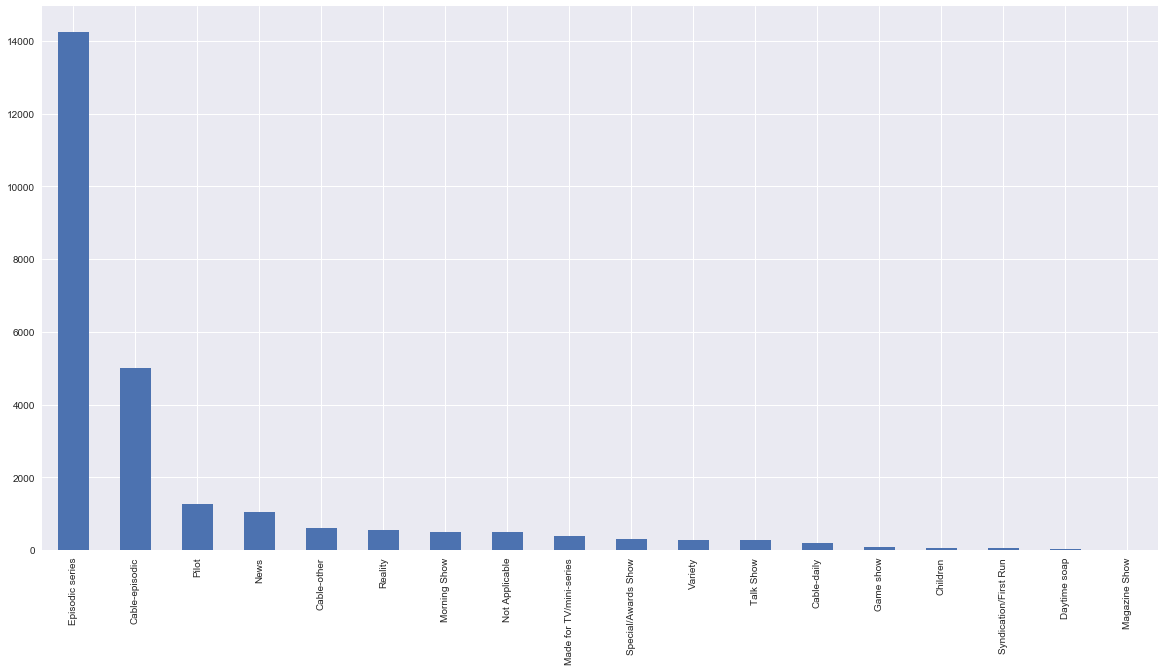

In [46]:
pd.value_counts(relevant_data.loc[relevant_data['Category'] == 'Television']['SubCategoryName']).plot.bar()
plt.show()

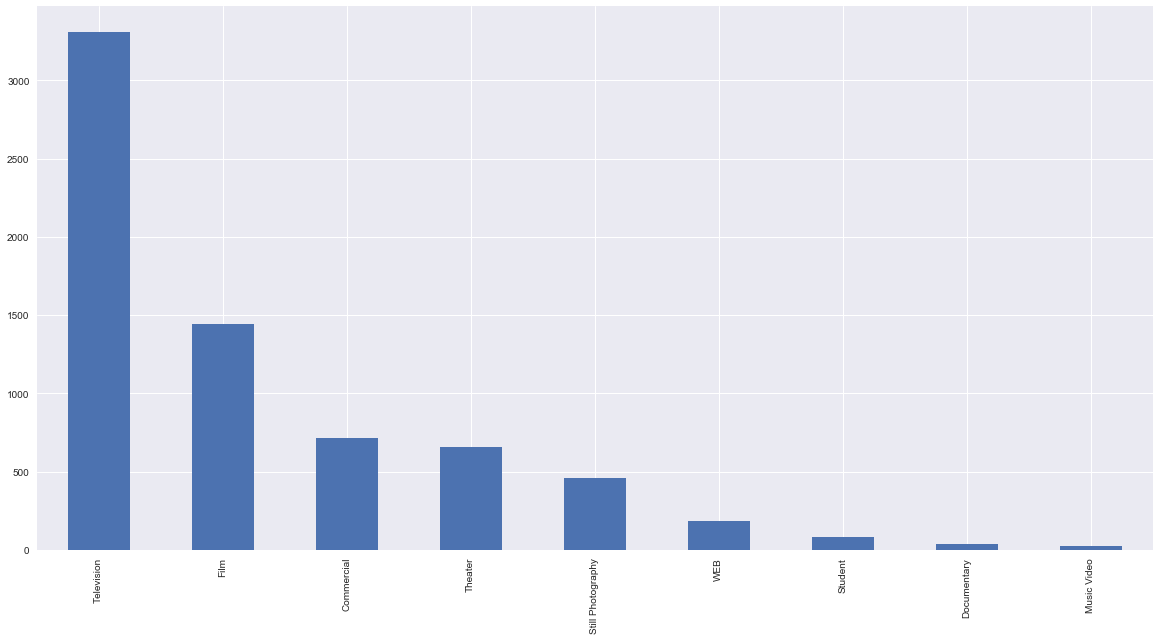

In [51]:
pd.value_counts(relevant_data.loc[relevant_data['StartDateYear'] == 2012]['Category']).plot.bar()
plt.show()

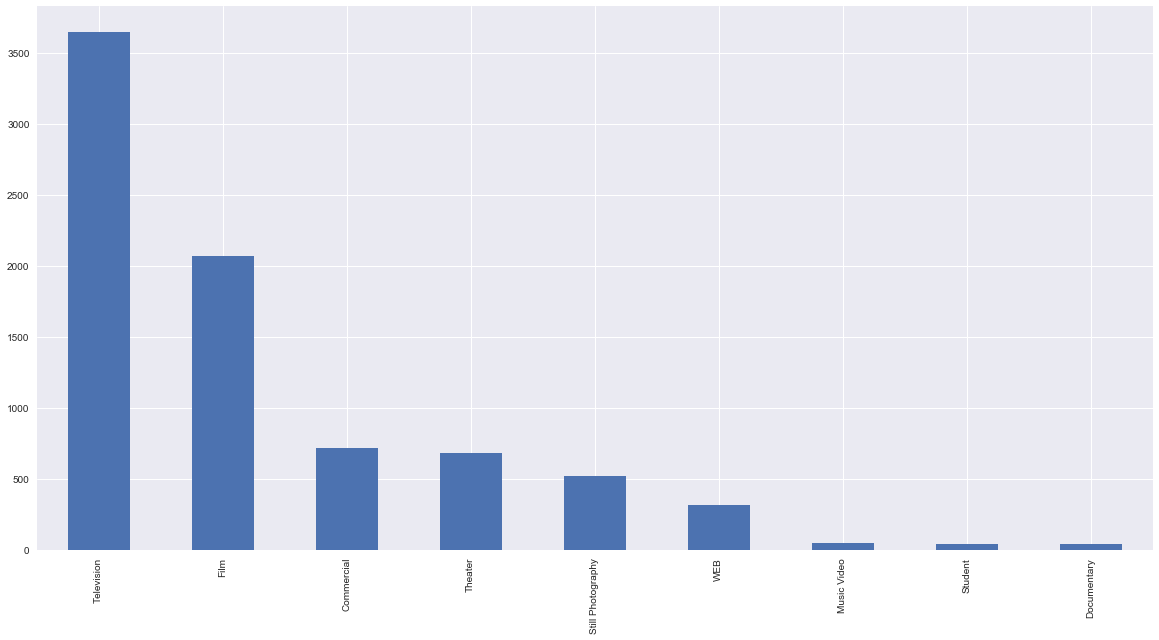

In [52]:
pd.value_counts(relevant_data.loc[relevant_data['StartDateYear'] == 2013]['Category']).plot.bar()
plt.show()

In [76]:
print(pd.value_counts(relevant_data.loc[relevant_data['StartDateYear'] == 2012]['Category']))
print('\n')
print(pd.value_counts(relevant_data.loc[relevant_data['StartDateYear'] == 2013]['Category']))
print('\n')
print(pd.value_counts(relevant_data.loc[relevant_data['StartDateYear'] == 2014]['Category']))
print('\n')
print(pd.value_counts(relevant_data.loc[relevant_data['StartDateYear'] == 2015]['Category']))
print('\n')
print(pd.value_counts(relevant_data.loc[relevant_data['StartDateYear'] == 2016]['Category']))

Television           3307
Film                 1445
Commercial            717
Theater               656
Still Photography     458
WEB                   185
Student                80
Documentary            35
Music Video            27
Name: Category, dtype: int64


Television           3645
Film                 2069
Commercial            720
Theater               685
Still Photography     520
WEB                   319
Music Video            51
Student                44
Documentary            41
Name: Category, dtype: int64


Television           4497
Film                 1172
Commercial            719
Theater               704
Still Photography     556
WEB                   197
Documentary            55
Student                51
Music Video            11
Name: Category, dtype: int64


Television           5027
Film                 1441
Theater               746
Commercial            727
Still Photography     588
WEB                   318
Student                57
Documentary            

In [92]:
relevant_data['DiffSeconds'] = (relevant_data['EndDateTime'] - relevant_data['StartDateTime']).dt.total_seconds()

In [113]:
print(relevant_data['DiffSeconds'].max())
print(relevant_data['DiffSeconds'].min())
print(relevant_data['DiffSeconds'].mean())

12700800.0
60.0
71234.89606368863


In [140]:
relevant_data.loc[relevant_data['DiffSeconds'] > 3600*24]

,EventID,EventType,StartDateTime,EndDateTime,EnteredOn,EventAgency,ParkingHeld,Borough,CommunityBoard(s),PolicePrecinct(s),Category,SubCategoryName,Country,ZipCode(s),StartDateYear,EndDateYear,DiffSeconds,StartDateMonth,EndDateMonth
9,300122,Theater Load in and Load Outs,2016-07-18 00:01:00,2016-07-20 06:00:00,07/13/2016 09:20:31 AM,"Mayor's Office of Film, Theatre & Broadcasting",WEST 126 STREET between ADAM CLAYTON POWELL B...,Manhattan,10,28,Theater,Theater,United States of America,10027,2016,2016,194340.0,7,7
14,300687,Shooting Permit,2016-07-18 06:00:00,2016-07-19 22:00:00,07/15/2016 10:49:46 AM,"Mayor's Office of Film, Theatre & Broadcasting",WEST 44 STREET between 6 AVENUE and 5 AVENUE...,Manhattan,5,14,Television,Episodic series,United States of America,10036,2016,2016,144000.0,7,7
32,295376,Theater Load in and Load Outs,2016-07-18 00:01:00,2016-07-19 23:59:00,06/17/2016 12:49:21 PM,"Mayor's Office of Film, Theatre & Broadcasting",WEST 33 STREET between 7 AVENUE and 8 AVENUE...,Manhattan,5,14,Theater,Theater,United States of America,"10001, 10121",2016,2016,172680.0,7,7
49,43997,Theater Load in and Load Outs,2012-01-19 07:00:00,2012-02-20 22:00:00,01/09/2012 06:22:29 PM,"Mayor's Office of Film, Theatre & Broadcasting",WEST 46 STREET between BROADWAY and 8 AVENUE,Manhattan,5,18,Theater,Theater,United States of America,10036,2012,2012,2818800.0,1,2
58,300545,Shooting Permit,2016-07-19 04:00:00,2016-07-20 16:00:00,07/14/2016 03:18:31 PM,"Mayor's Office of Film, Theatre & Broadcasting",MONTAGUE STREET between HICKS STREET and MONTA...,Brooklyn,2,84,Still Photography,Not Applicable,United States of America,11201,2016,2016,129600.0,7,7
78,295377,Theater Load in and Load Outs,2016-07-20 00:01:00,2016-07-21 06:00:00,06/17/2016 12:49:59 PM,"Mayor's Office of Film, Theatre & Broadcasting",WEST 33 STREET between 7 AVENUE and 8 AVENUE,Manhattan,5,14,Theater,Theater,United States of America,"10001, 10121",2016,2016,107940.0,7,7
91,300400,Theater Load in and Load Outs,2016-07-20 00:01:00,2016-07-21 06:00:00,07/14/2016 10:02:43 AM,"Mayor's Office of Film, Theatre & Broadcasting",WEST 31 STREET between 7 AVENUE and 8 AVENUE...,Manhattan,"4, 5",14,Theater,Theater,United States of America,"10001, 10121",2016,2016,107940.0,7,7
136,297159,Theater Load in and Load Outs,2016-07-22 00:01:00,2016-07-23 06:00:00,06/27/2016 11:27:34 AM,"Mayor's Office of Film, Theatre & Broadcasting",WEST 55 STREET between 11 AVENUE and 12 AVEN...,Manhattan,4,18,Theater,Theater,United States of America,10019,2016,2016,107940.0,7,7
149,297319,Theater Load in and Load Outs,2016-07-22 06:00:00,2016-07-24 06:00:00,06/27/2016 08:25:39 PM,"Mayor's Office of Film, Theatre & Broadcasting",AMSTERDAM AVENUE between WEST 73 STREET and ...,Manhattan,7,20,Theater,Theater,United States of America,10023,2016,2016,172800.0,7,7
155,43771,Theater Load in and Load Outs,2012-01-20 00:01:00,2012-01-21 06:00:00,01/06/2012 09:44:37 AM,"Mayor's Office of Film, Theatre & Broadcasting",6 AVENUE between LISPENARD STREET and WALKER S...,Manhattan,1,1,Theater,Theater,United States of America,10013,2012,2012,107940.0,1,1


In [103]:
relevant_data['DiffSeconds'].dtype

dtype('float64')

In [143]:
pd.value_counts(relevant_data['Category'])

Television             25375
Film                    8388
Theater                 4373
Commercial              4077
Still Photography       3021
WEB                     1598
Student                  309
Documentary              190
Music Video              149
Red Carpet/Premiere        1
Name: Category, dtype: int64

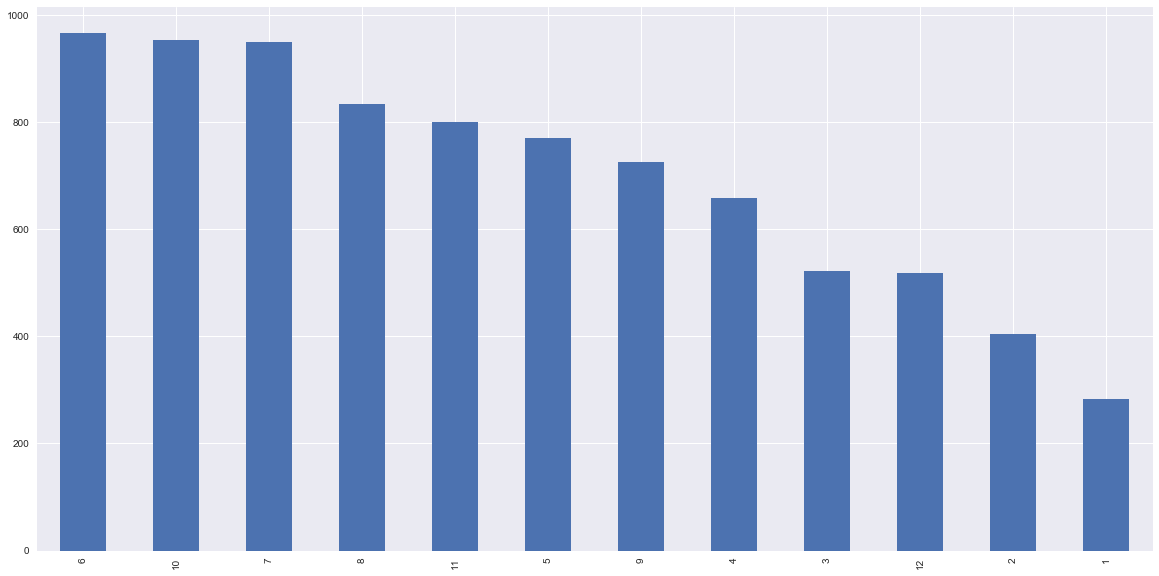

In [132]:
pd.value_counts(relevant_data.loc[relevant_data['Category'] == 'Film']['StartDateMonth']).plot.bar()
plt.show()

In [135]:
pd.value_counts(relevant_data['DiffSeconds'])

50400.0      8731
54000.0      6165
57600.0      5950
43200.0      3055
61200.0      2650
46800.0      2543
64740.0      1225
107940.0      937
36000.0       848
86280.0       794
39600.0       793
32400.0       766
64800.0       747
28800.0       684
25200.0       600
52200.0       600
61140.0       569
21600.0       513
68400.0       451
18000.0       430
86400.0       430
55800.0       390
48600.0       341
57540.0       331
72000.0       321
14400.0       278
50340.0       276
53940.0       234
194340.0      226
59400.0       224
             ... 
2048340.0       1
1252800.0       1
633540.0        1
158460.0        1
129480.0        1
2505540.0       1
2505480.0       1
35040.0         1
752400.0        1
2224740.0       1
687540.0        1
17400.0         1
86040.0         1
311400.0        1
2492940.0       1
221400.0        1
2231940.0       1
377400.0        1
1378800.0       1
1641480.0       1
63720.0         1
377880.0        1
1900740.0       1
3023940.0       1
8956800.0 

In [137]:
relevant_data.to_csv('relevant_data.csv', encoding='utf-8', index=False)

In [141]:
len(relevant_data)

47481